In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import math
from datetime import datetime
from sklearn import linear_model

data = pd.read_csv("owid-covid-data.csv") 

data = data[data.iso_code=="RUS"]
data = data[data.date >= '2020-03-03']
data.head(1000)


total = np.array(data.total_cases[0:50])
new = np.array(data.new_cases[0:50])

total_exp = [math.log(x) for x in total] 
new = [x if x!=0 else 1 for x in new]


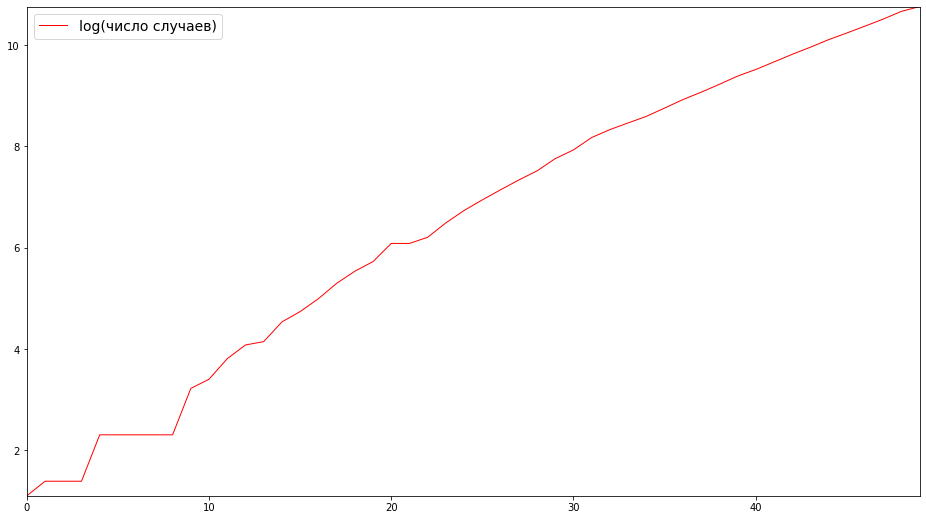

Матожидание нормально-распределенного коэффицента при числе дней [0.20328037]
Матожидание нормально-распределенного свободного члена: 1.4789565694775941


In [11]:
days = np.linspace(0,49,50)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.set_xlim((days[0], days[-1]))
ax.set_ylim((total_exp[0], total_exp[-1]))
ax.plot(days, total_exp, linewidth=1, label="log(число случаев)", color="red")
#ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper left", fontsize=14)

plt.show()

model = linear_model.LinearRegression(fit_intercept=True).fit(days.reshape(-1,1), total_exp)

Для простоты предположим независимость и нормальность распределения свободного члена и коэффицента при числе дней. Тогда коэффиценты линейной регрессии будут максимизировать априорную вероятночсть 

In [13]:
print("Матем. ожидание нормально-распределенного коэффицента при числе дней", model.coef_)
print("Матем. ожидание нормально-распределенного свободного члена:", model.intercept_)

Матем. ожидание нормально-распределенного коэффицента при числе дней [0.20328037]
Матем. ожидание нормально-распределенного свободного члена: 1.4789565694775941


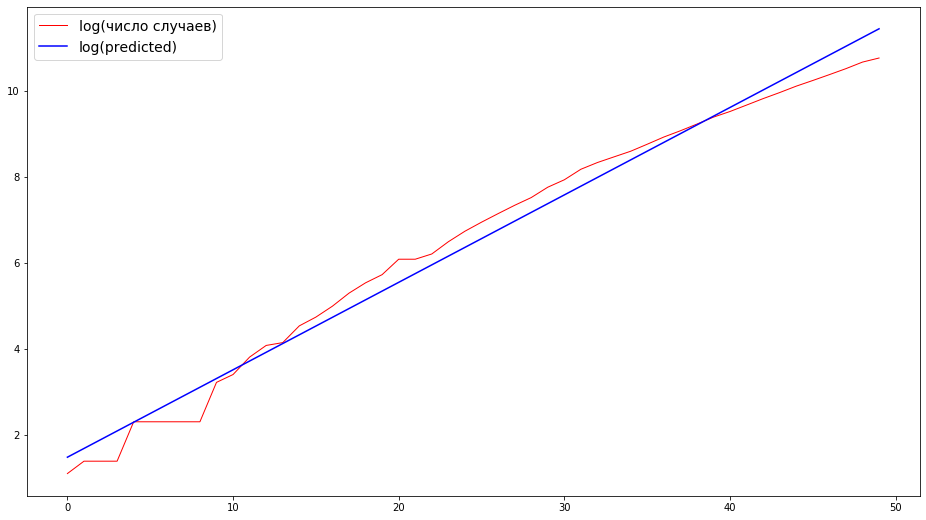

In [19]:
transition = lambda x: x * model.coef_ + model.intercept_
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.plot(days, total_exp, linewidth=1, label="log(число случаев)", color="red")
ax.plot(days, transition(days), label="log(predicted)", color = "blue")
ax.legend(loc="upper left", fontsize=14)

plt.show()


In [23]:
residuals=  total_exp - transition(days)
print(residuals)

[-0.38034428 -0.29594258 -0.49922296 -0.70250333  0.01050703 -0.19277335
 -0.39605372 -0.5993341  -0.80261447 -0.08960411 -0.11056293  0.0916218
  0.15921638  0.02153329  0.20771768  0.20803626  0.25899003  0.35858189
  0.39538618  0.38230142  0.53765485  0.33437448  0.25343296  0.33479975
  0.37571634  0.38215649  0.37779027  0.3681073   0.34453752  0.38253591
  0.35175869  0.39349117  0.34669407  0.27468295  0.20162582  0.16133745
  0.12520817  0.0675243   0.01974451 -0.02116994 -0.09352364 -0.14758724
 -0.20054707 -0.26288957 -0.31727289 -0.38883037 -0.45611264 -0.52007128
 -0.57088361 -0.67922087]
